<a href="https://colab.research.google.com/github/eriosta/ai-course/blob/main/4_2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2. Classification-based Machine Learning

## Learning Objectives


1. **Algorithm Understanding:** Understand the differences between Logistic Regression, Random Forest Classification, and Gradient Boosting Classification in terms of algorithm type, regularization techniques, interpretability, and deployment ease.

2. **Evaluation Metrics:** Gain proficiency in using Accuracy, Precision, Recall, F1 Score, and AUC-ROC as evaluation metrics to assess the performance of classification models.

3. **Data Preparation**: Learn how to prepare data for classification modeling, including handling categorical features using one-hot encoding and splitting data into training and testing sets.

4. **Model Training and Evaluation:** Acquire the skills to train and evaluate different classification models using libraries like scikit-learn and XGBoost, and understand how to interpret and compare their evaluation results.

5. **Hyperparameter Tuning:** Familiarize with techniques such as grid search to optimize the performance of classification models.

6. **Explainability and Interpretability:** Explore the concept of explainability in machine learning, perform SHAP analysis (if you decide to include it later) to explain model predictions, and visualize insights into feature importance.

7. **Visualization:** Learn to visualize model results using confusion matrices and ROC-AUC curves to interpret classification outcomes.



## Background

<table>
  <thead>
    <tr>
      <th>Model</th>
      <th>Algorithm</th>
      <th>Regularization</th>
      <th>Interpretability</th>
      <th>Deployment Ease</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Logistic Regression</td>
      <td>Linear</td>
      <td>L1/L2 Regularization</td>
      <td>🔍 High</td>
      <td>🚀 Easy</td>
    </tr>
    <tr>
      <td>Random Forest Classifier</td>
      <td>Ensemble</td>
      <td>None</td>
      <td>🔍 Medium</td>
      <td>🛠️ Relatively Easy</td>
    </tr>
    <tr>
      <td>Gradient Boosting Classifier</td>
      <td>Ensemble</td>
      <td>Gradient Boosting</td>
      <td>🔍 Medium</td>
      <td>🛠️ Relatively Easy</td>
    </tr>
  </tbody>
</table>

### Logistic Regression:
📈 Logistic Regression is a linear model used for binary or multinomial classification. It predicts the probability of an instance belonging to a particular category. It's interpretable and provides coefficients for each feature indicating its significance in predictions. In the medical field, Logistic Regression helps clinicians predict the likelihood of an event (e.g., disease onset, patient readmission).

### Random Forest Classifier:
🌲 Random Forest Classifier consists of multiple decision trees, collectively making a decision by majority voting. Each tree is trained on a random subset of data and features, ensuring diversity among them. This approach is adept at handling intricate relationships and provides feature importance metrics, aiding in the interpretation of how different factors affect predictions. In the clinical realm, it's employed for diagnostic and predictive tasks due to its robustness against overfitting and ability to handle large datasets.

### Gradient Boosting Classifier:
⚡ Gradient Boosting Classifier is an ensemble method that builds multiple decision trees sequentially. Each tree is designed to correct the errors made by its predecessor. By combining multiple weak learners, it forms a powerful classifier that can capture intricate patterns in the data. In medicine, this technique assists in diagnosing complex diseases and predicting patient outcomes with high precision.

## Evaluation Metrics

### Accuracy:
Accuracy measures the fraction of correct predictions made by the model out of all predictions. It's straightforward and gives a quick overview of the model's performance, especially when the classes are balanced.

### Precision:
Precision gauges the accuracy of positive predictions. In the medical context, it represents the ratio of correctly predicted positive observations to the total predicted positives.

### Recall:
Recall (or Sensitivity) reflects the ratio of correctly predicted positive observations to all observations in the actual class. It's crucial in scenarios where missing a positive case could have serious consequences, like in disease diagnosis.

### F1 Score:
The F1 Score is the harmonic mean of precision and recall, offering a balance between the two. It's particularly useful when the class distribution is imbalanced.

### AUC-ROC:
The Area Under the Receiver Operating Characteristic (AUC-ROC) curve evaluates the model's ability to distinguish between the classes. An AUC of 1 indicates perfect classification, while an AUC of 0.5 suggests the model is no better than random guessing. In healthcare, high AUC values indicate a model's effectiveness in distinguishing between patients with and without a condition.

## Load Data and Prepare Features

In [13]:
! pip install -q pandas-profiling shap

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import os
import shutil

# Replace 'path_to_kaggle_json' with the actual path to your downloaded kaggle.json file
path_to_kaggle_json = '/content/drive/MyDrive/Workshop/kaggle.json'

# Define the target directory for kaggle.json (usually /root/.kaggle/)
target_dir = '/root/.kaggle/'

try:
    os.makedirs(target_dir, exist_ok=True)
    shutil.copy(path_to_kaggle_json, target_dir)
    os.chmod(os.path.join(target_dir, 'kaggle.json'), 600)  # Set appropriate permissions
    print("kaggle.json successfully copied to the correct directory.")
except Exception as e:
    print("An error occurred:", e)

kaggle.json successfully copied to the correct directory.


In [16]:
! kaggle datasets download -d jillanisofttech/brain-stroke-dataset
! unzip brain-stroke-dataset.zip

brain-stroke-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  brain-stroke-dataset.zip
replace brain_stroke.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## Exploratory Data Analysis

In [17]:
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv('brain_stroke.csv')

# Generate the EDA report
profile = ProfileReport(df, title="Automated EDA Report", explorative=True)
profile.to_file("eda_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Train and Evaluate Classification Models

`use_label_encoder` is deprecated in 1.7.0.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`use_label_encoder` is deprecated in 1.7.0.
`use_label_encoder` is deprecated in 1.7.0.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


                         Method  Accuracy  Precision    Recall        F1
0           Logistic Regression  0.736209   0.150502  0.833333  0.254958
1      Random Forest Classifier  0.918756   0.153846  0.111111  0.129032
2  Gradient Boosting Classifier  0.936810   0.000000  0.000000  0.000000


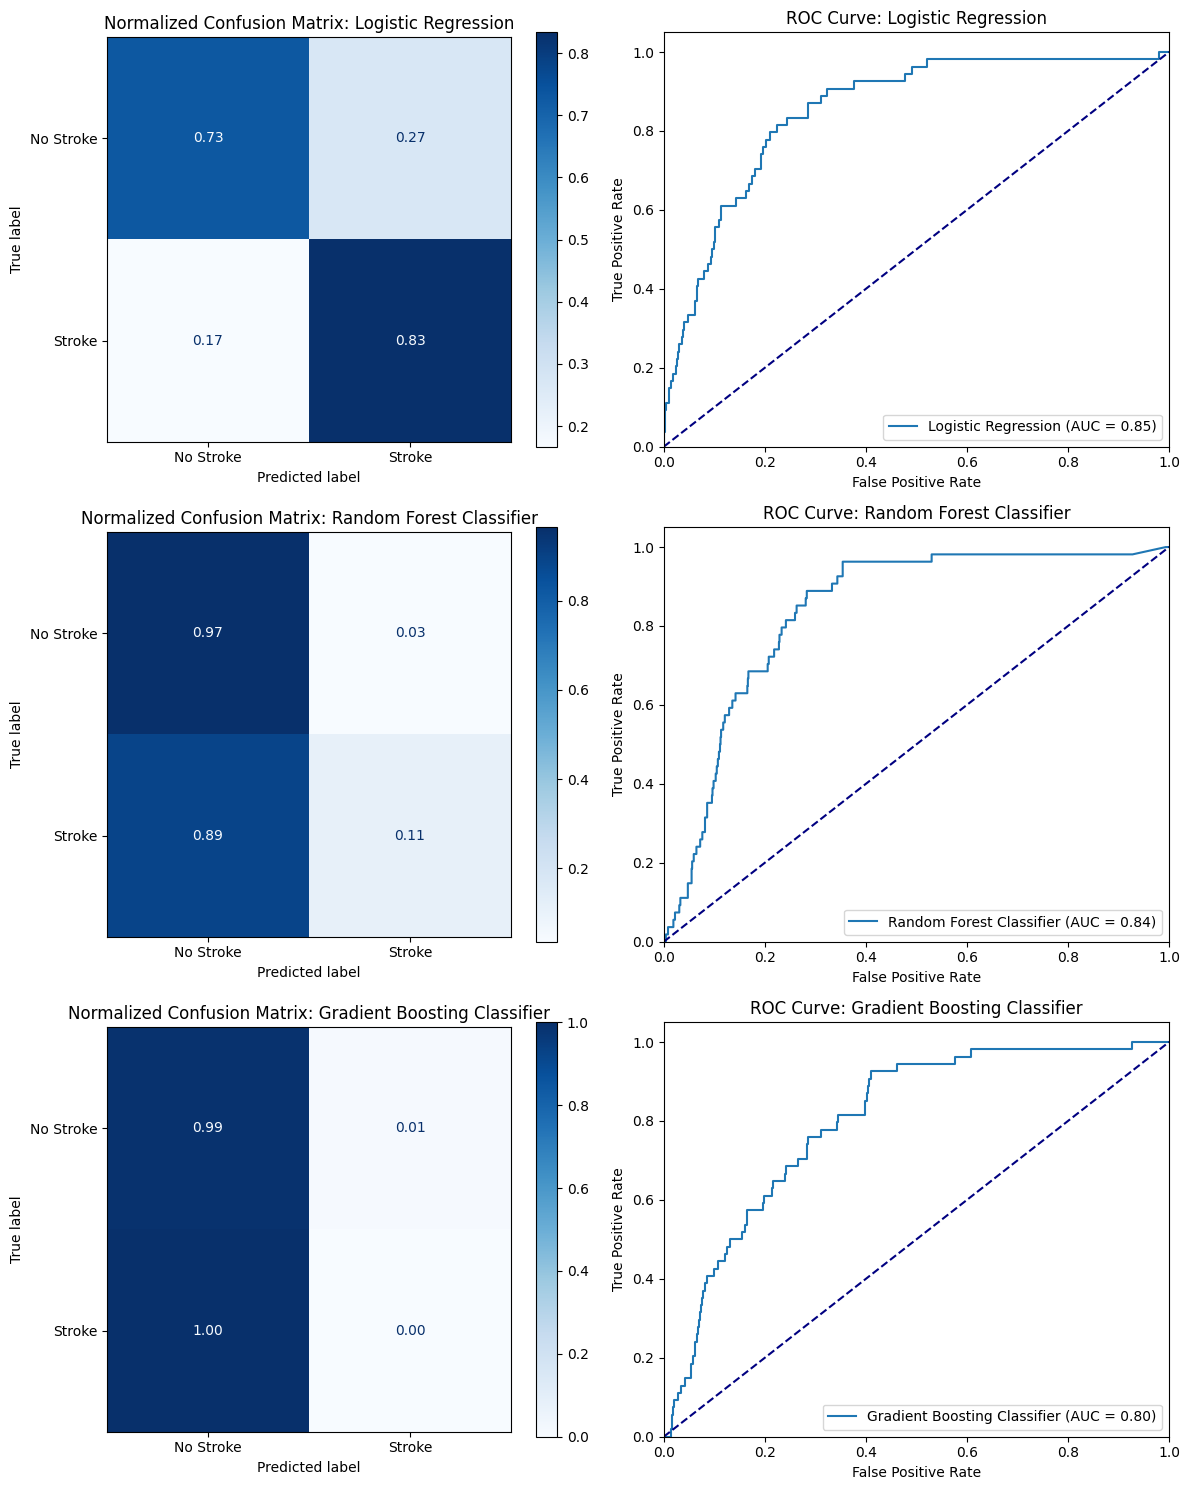

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay)
from sklearn.preprocessing import OneHotEncoder
import shap
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Load the data
df = pd.read_csv('brain_stroke.csv')

# Prepare the data
X = df.drop('stroke', axis=1)  # Features
y = df['stroke']  # Target

# One-hot encode categorical features
categorical_features = ['gender','ever_married','work_type','Residence_type','smoking_status']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define hyperparameters grid for Random Forest
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define hyperparameters grid for XGBoost
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize classification models with hyperparameter tuning
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, class_weight='balanced'),
    'Random Forest Classifier': GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid=rf_params, cv=3, scoring='f1', n_jobs=-1),
    'Gradient Boosting Classifier': GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid=xgb_params, cv=3, scoring='f1', n_jobs=-1)
}

# Initialize results DataFrame
results = pd.DataFrame(columns=['Method', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Train and evaluate each model
for method, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results = results.append({
        'Method': method,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    }, ignore_index=True)

# Print the results
print(results)

# Plot confusion matrices and ROC-AUC curves
fig, axs = plt.subplots(len(models), 2, figsize=(12, 5 * len(models)))

for idx, (method, model) in enumerate(models.items()):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['No Stroke', 'Stroke']).plot(ax=axs[idx, 0], cmap='Blues', values_format=".2f")  # values_format for better formatting

    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(y_test, y_prob), estimator_name=method)
    roc_disp.plot(ax=axs[idx, 1])

    axs[idx, 0].set_title(f'Normalized Confusion Matrix: {method}')
    axs[idx, 1].set_title(f'ROC Curve: {method}')
    axs[idx, 1].plot([0, 1], [0, 1], color='navy', linestyle='--')
    axs[idx, 1].set_xlim([0.0, 1.0])
    axs[idx, 1].set_ylim([0.0, 1.05])
    axs[idx, 1].set_ylabel('True Positive Rate')
    axs[idx, 1].set_xlabel('False Positive Rate')

plt.tight_layout()
plt.show()



## Identify and Save Best Performing Model

In [31]:
import pickle

# Compute AUC and add it to the results DataFrame
results['AUC'] = [roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) for model in models.values()]

best_method = results.loc[results['AUC'].idxmax()]['Method']
print(f"Best performing method (based on highest AUC): {best_method}")

# Save the best model as model.pkl
best_model = models[best_method]
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

Best performing method (based on highest AUC): Logistic Regression


## Explainability with SHAP

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


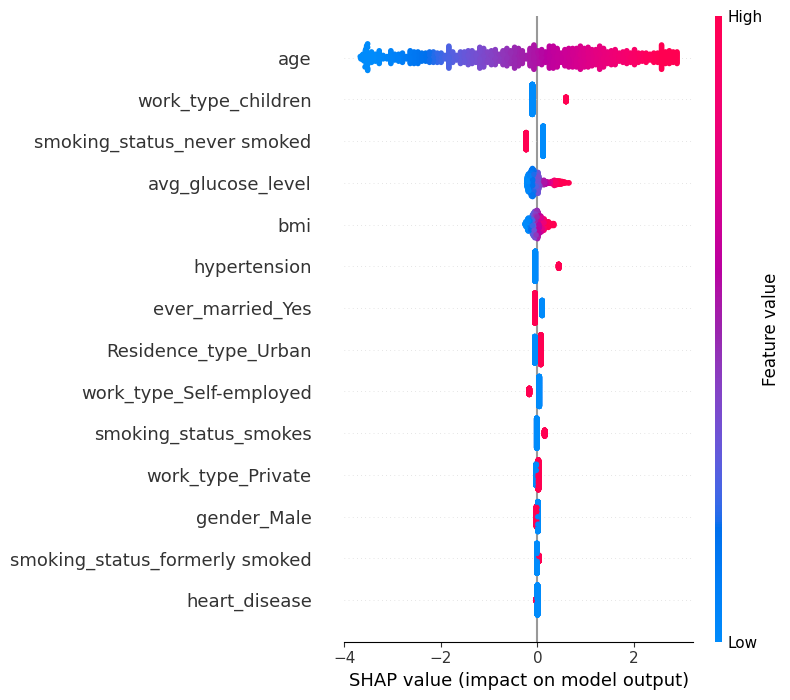

<Figure size 800x600 with 0 Axes>

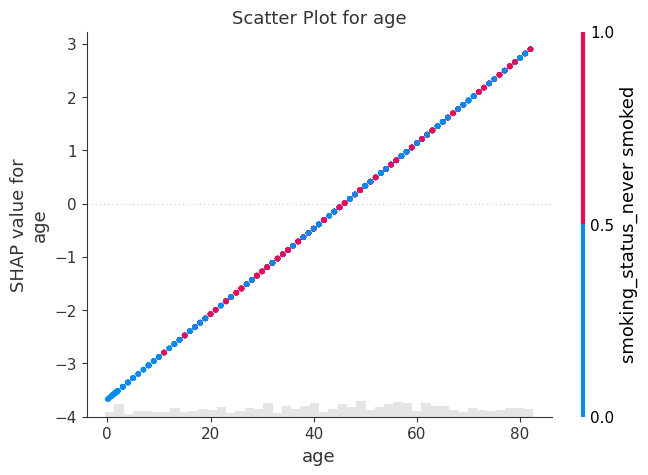

<Figure size 800x600 with 0 Axes>

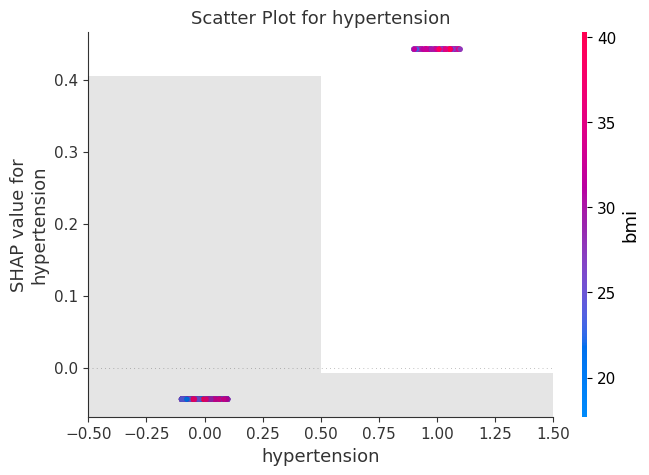

<Figure size 800x600 with 0 Axes>

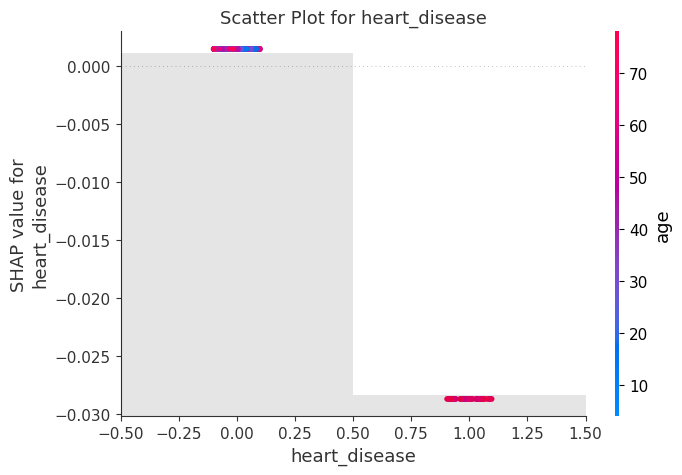

<Figure size 800x600 with 0 Axes>

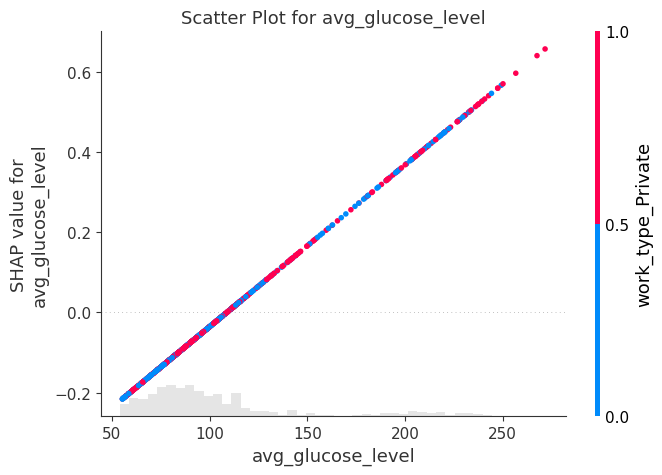

<Figure size 800x600 with 0 Axes>

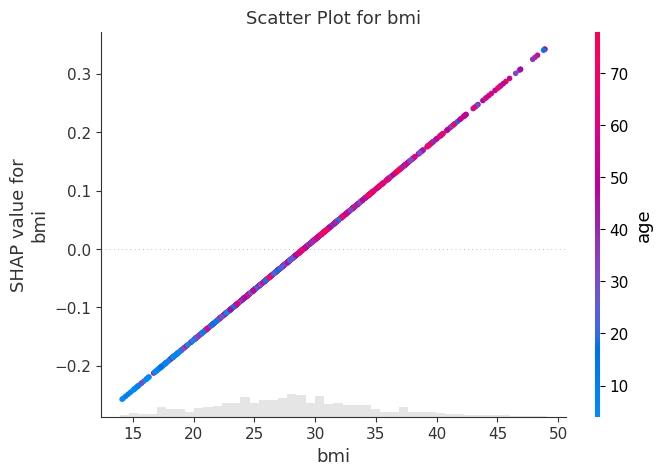

<Figure size 800x600 with 0 Axes>

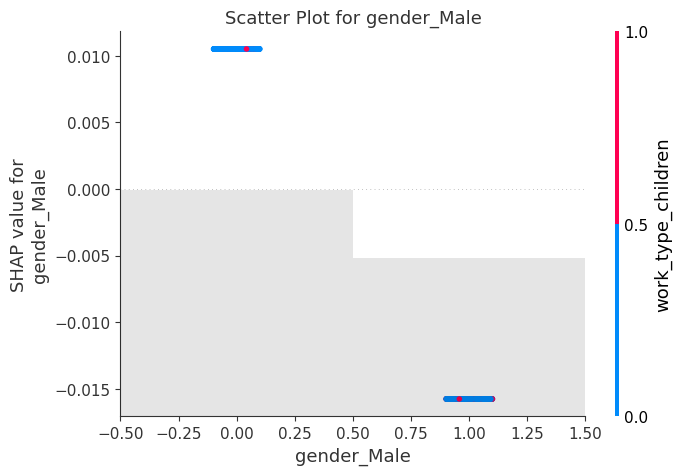

<Figure size 800x600 with 0 Axes>

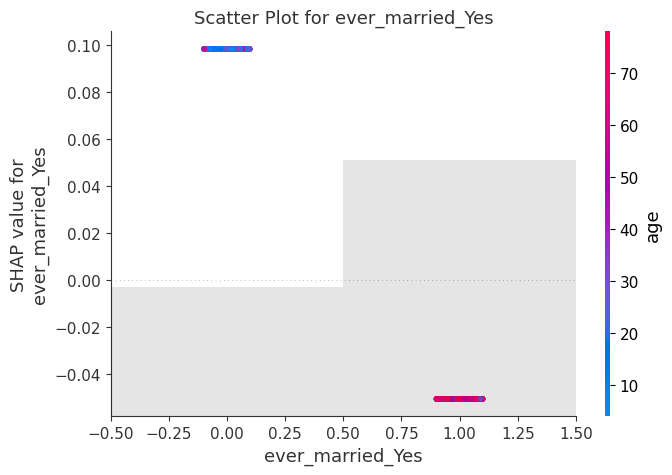

<Figure size 800x600 with 0 Axes>

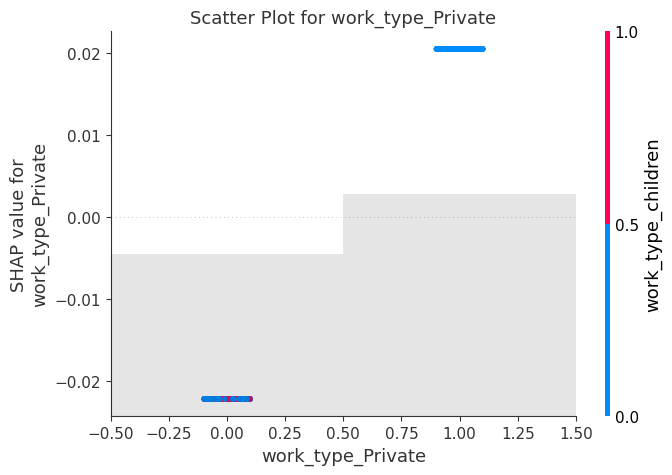

<Figure size 800x600 with 0 Axes>

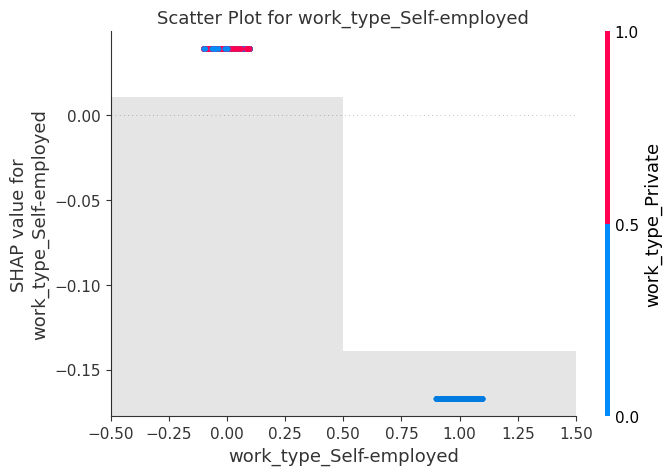

<Figure size 800x600 with 0 Axes>

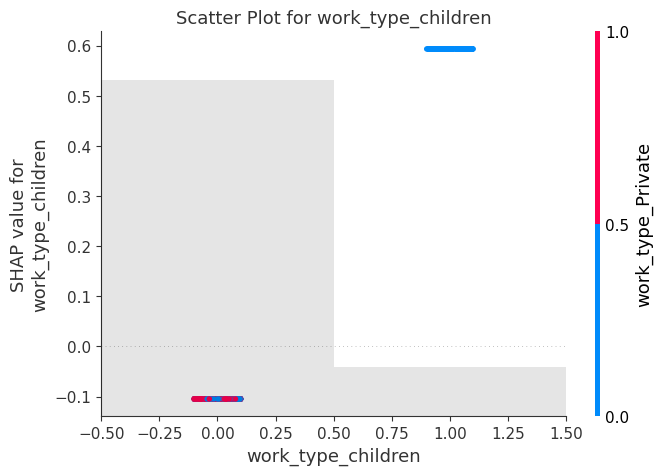

<Figure size 800x600 with 0 Axes>

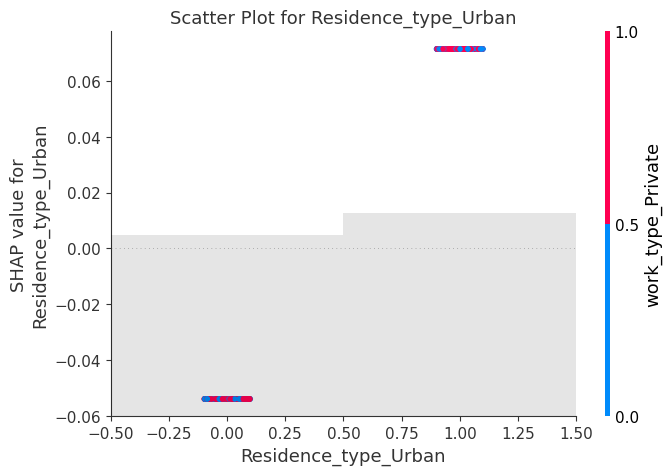

<Figure size 800x600 with 0 Axes>

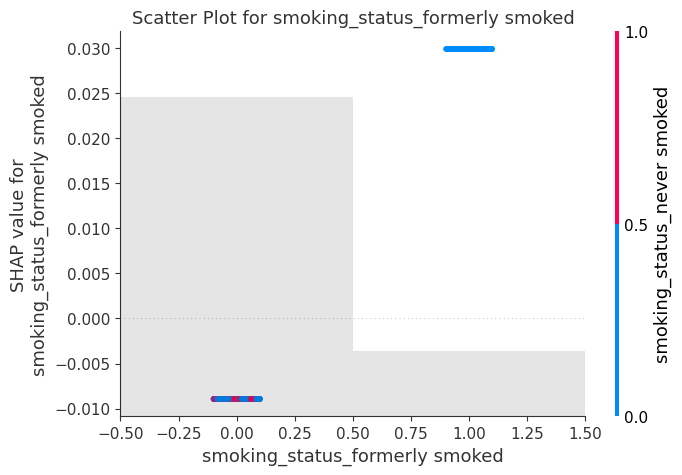

<Figure size 800x600 with 0 Axes>

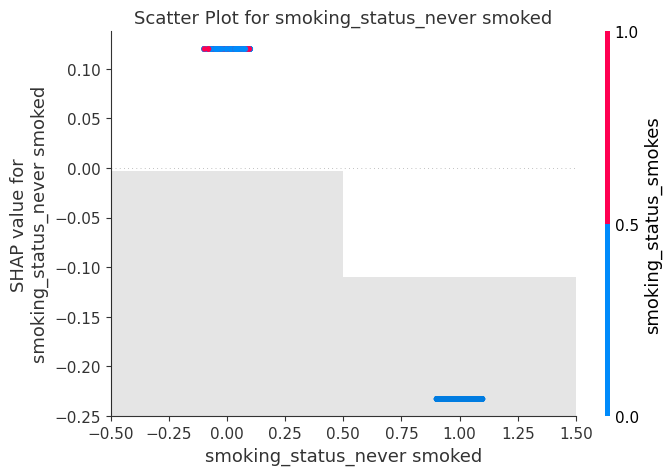

<Figure size 800x600 with 0 Axes>

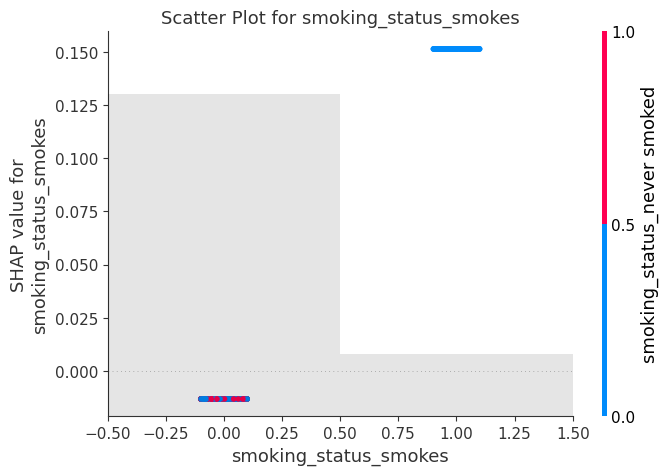

In [32]:
# Perform SHAP analysis on the best method
best_model = models[best_method]
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test)

# Create scatter plots for each feature using SHAP values
for feature in X_encoded.columns:
    plt.figure(figsize=(8, 6))
    shap.plots.scatter(shap_values[:, feature], color=shap_values, title=f'Scatter Plot for {feature}')
    plt.show()